2348555

Satyam Kumar

Dataset: Wind & Solar Daily Power Production

This dataset consists of wind  and solar  energy production (in MW) records on an hourly basis for the French grid since 2020.


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading dataset
data = pd.read_csv('/content/intermittent-renewables-production-france.csv')

In [3]:
#reading data
data.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [4]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [5]:
#describe
data.describe()

,Production,dayOfYear
count,59804.000000,59806.000000
mean,2792.859775,172.454720
std,3190.239316,104.937607
min,0.000000,1.000000
25%,42.000000,84.000000
50%,1871.000000,164.000000
75%,4053.250000,262.000000
max,17220.000000,366.000000


count    59804.000000
mean      2792.859775
std       3190.239316
min          0.000000
25%         42.000000
50%       1871.000000
75%       4053.250000
max      17220.000000
Name: Production, dtype: float64


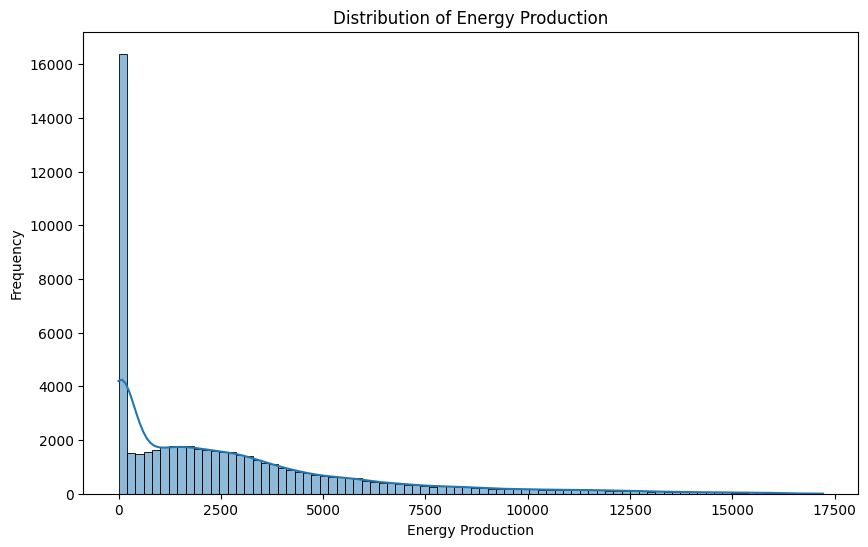

In [6]:
# Check the basic statistics of the 'Production' variable
print(data['Production'].describe())

# Create a histogram and a KDE of the 'Production' variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Production'], kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of energy production is heavily skewed to the right, with most of the production values close to zero. This indicates that there are many time periods with low or no energy production, which is typical for intermittent renewable energy sources like solar power that depend on environmental conditions

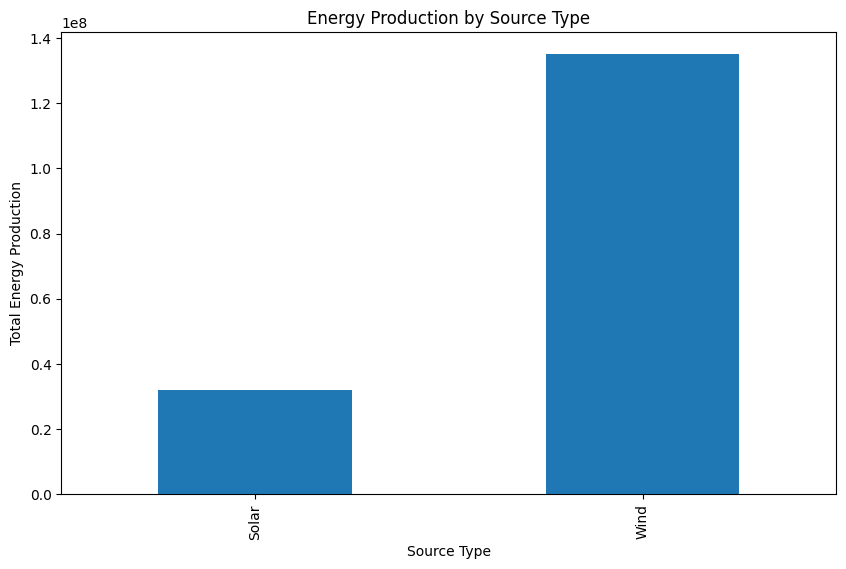

In [7]:
# Group by 'Source' and sum 'Production'
source_production = data.groupby('Source')['Production'].sum()

# Plot energy production by source type
plt.figure(figsize=(10, 6))
source_production.plot(kind='bar')
plt.title('Energy Production by Source Type')
plt.xlabel('Source Type')
plt.ylabel('Total Energy Production')
plt.show()

The bar plot reveals that most of the energy in this dataset is produced by wind, followed by solar power. This information can be useful when considering the expansion or reduction of different energy sources.

<ipython-input-8-7f7b2ac72fa7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


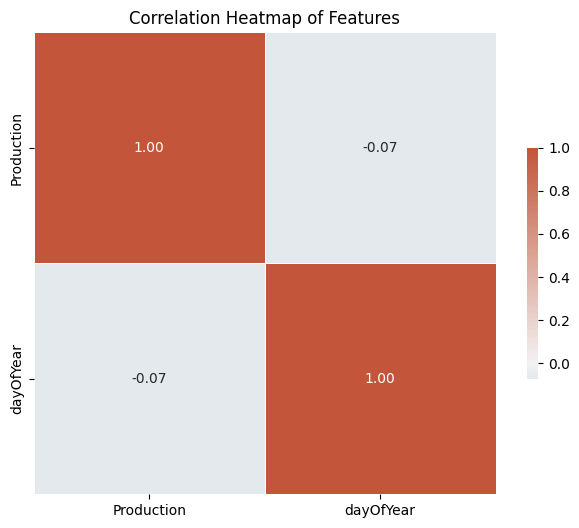

In [8]:
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Features')
plt.show()


From the heatmap, we can see that the 'Production' variable does not have a strong correlation with the 'dayOfYear' variable, indicating that there may not be a strong seasonal pattern in the energy production

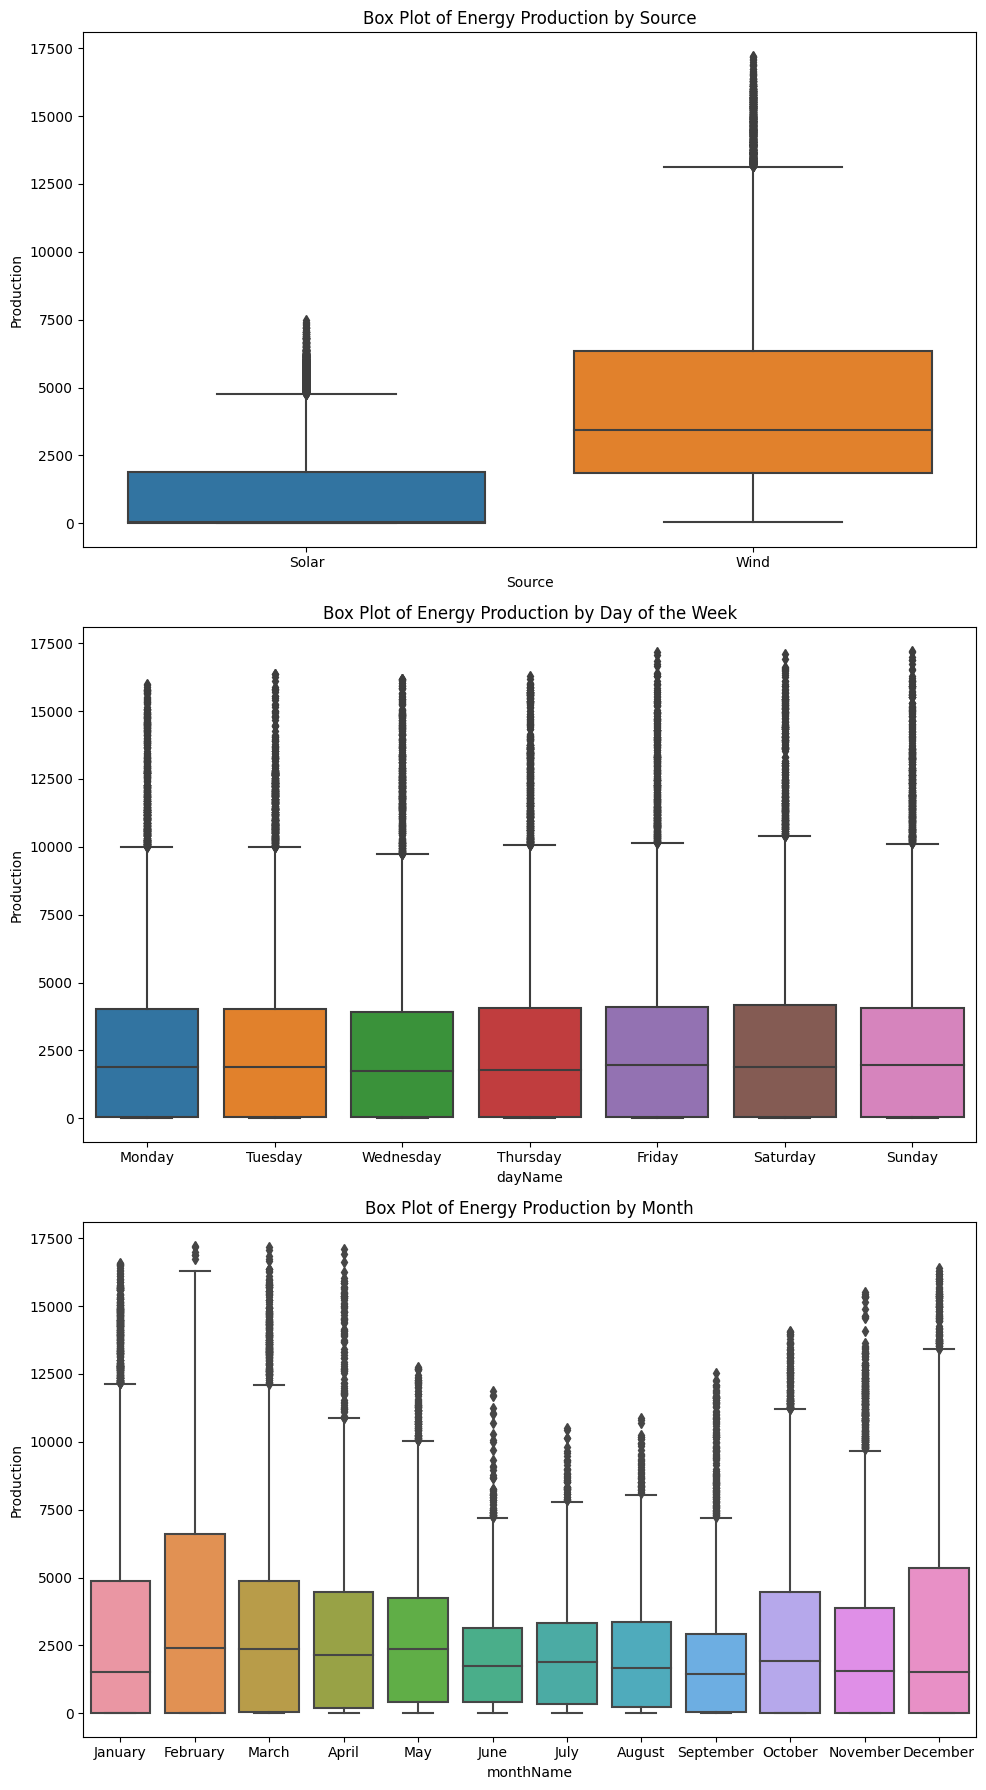

In [9]:
# Create box plots of 'Production' grouped by 'Source', 'dayName', and 'monthName'
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.boxplot(ax=axes[0], x='Source', y='Production', data=data)
axes[0].set_title('Box Plot of Energy Production by Source')

sns.boxplot(ax=axes[1], x='dayName', y='Production', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1].set_title('Box Plot of Energy Production by Day of the Week')

sns.boxplot(ax=axes[2], x='monthName', y='Production', data=data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
axes[2].set_title('Box Plot of Energy Production by Month')

plt.tight_layout()
plt.show()

The box plots provide a visual summary of the median, quartiles, and outliers for the 'Production' variable, grouped by different categories.

From the first box plot, we can see that wind energy production tends to be higher than solar energy production on average. The median wind energy production is higher than the median solar energy production, and the interquartile range (the range between the 25th and 75th percentiles, represented by the box) is also wider for wind energy, indicating a larger variability in wind energy production.

The second box plot shows that the energy production does not vary significantly by day of the week. The median energy production is similar for all days of the week, although there are some differences in the interquartile ranges and the number and extent of outliers.

The third box plot shows some seasonality in the energy production. The median energy production is higher in the summer months (from May to August) and lower in the winter months (from November to February). This is likely due to the higher solar radiation and wind speeds in the summer months

In [10]:

# Convert 'Date and Hour' column to datetime type
data['Date and Hour'] = pd.to_datetime(data['Date and Hour'], utc=True)

# Set 'Date and Hour' as the index
data.set_index('Date and Hour', inplace=True)

# Create 'hour' feature
data['hour'] = data.index.hour

# Create 'dayOfWeek' feature
data['dayOfWeek'] = data.index.dayofweek

# Create 'month' feature
data['month'] = data.index.month

# Create lag features
for i in range(1, 7):
    data[f'lag_{i}'] = data['Production'].shift(i)

# Drop the rows with missing values (caused by creating lag features)
data.dropna(inplace=True)

# Display the first few rows of the dataset
data.head()

,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName,hour,dayOfWeek,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date and Hour,,,,,,,,,,,,,,,,,
2020-07-24 02:00:00+00:00,2020-07-24,04:00:00,05:00:00,Solar,0.0,206,Friday,July,2,4,7,0.0,0.0,658.0,2517.0,223.0,244.0
2020-07-24 03:00:00+00:00,2020-07-24,05:00:00,06:00:00,Solar,0.0,206,Friday,July,3,4,7,0.0,0.0,0.0,658.0,2517.0,223.0
2020-07-24 08:00:00+00:00,2020-07-24,10:00:00,11:00:00,Solar,2708.0,206,Friday,July,8,4,7,0.0,0.0,0.0,0.0,658.0,2517.0
2020-07-24 12:00:00+00:00,2020-07-24,14:00:00,15:00:00,Solar,3851.0,206,Friday,July,12,4,7,2708.0,0.0,0.0,0.0,0.0,658.0
2020-07-24 14:00:00+00:00,2020-07-24,16:00:00,17:00:00,Solar,3261.0,206,Friday,July,14,4,7,3851.0,2708.0,0.0,0.0,0.0,0.0


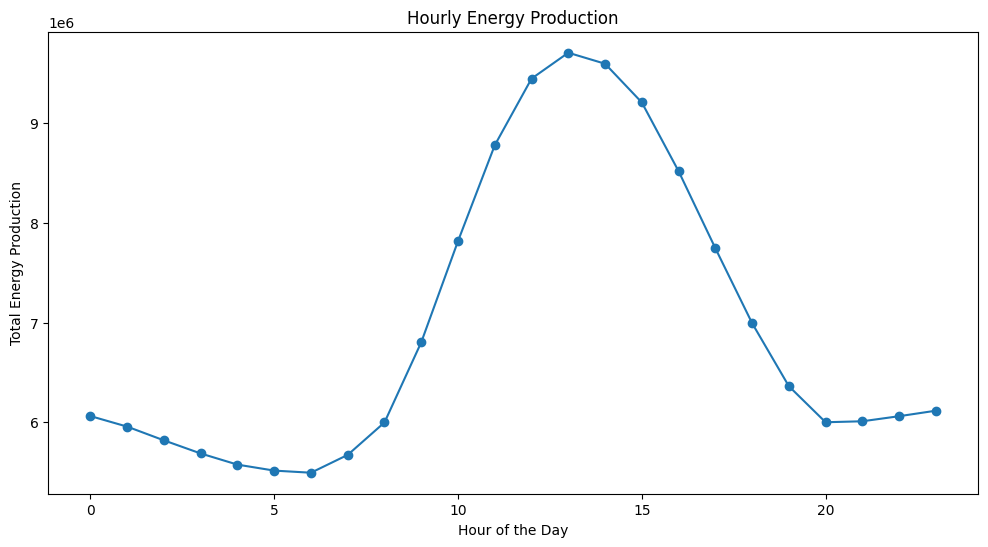

In [11]:
# Convert 'StartHour' back to datetime format
data['StartHour'] = pd.to_datetime(data['StartHour'], format='%H:%M:%S').dt.hour

# Group by 'StartHour' and sum 'Production'
hourly_production = data.groupby('StartHour')['Production'].sum()

# Plot hourly energy production
plt.figure(figsize=(12, 6))
hourly_production.plot(kind='line', marker='o')
plt.title('Hourly Energy Production')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Energy Production')
plt.show()

<ipython-input-12-db34cd6b6b2c>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_solar_resampled = data_solar_original.resample('H').mean()
<ipython-input-12-db34cd6b6b2c>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_wind_resampled = data_wind_original.resample('H').mean()


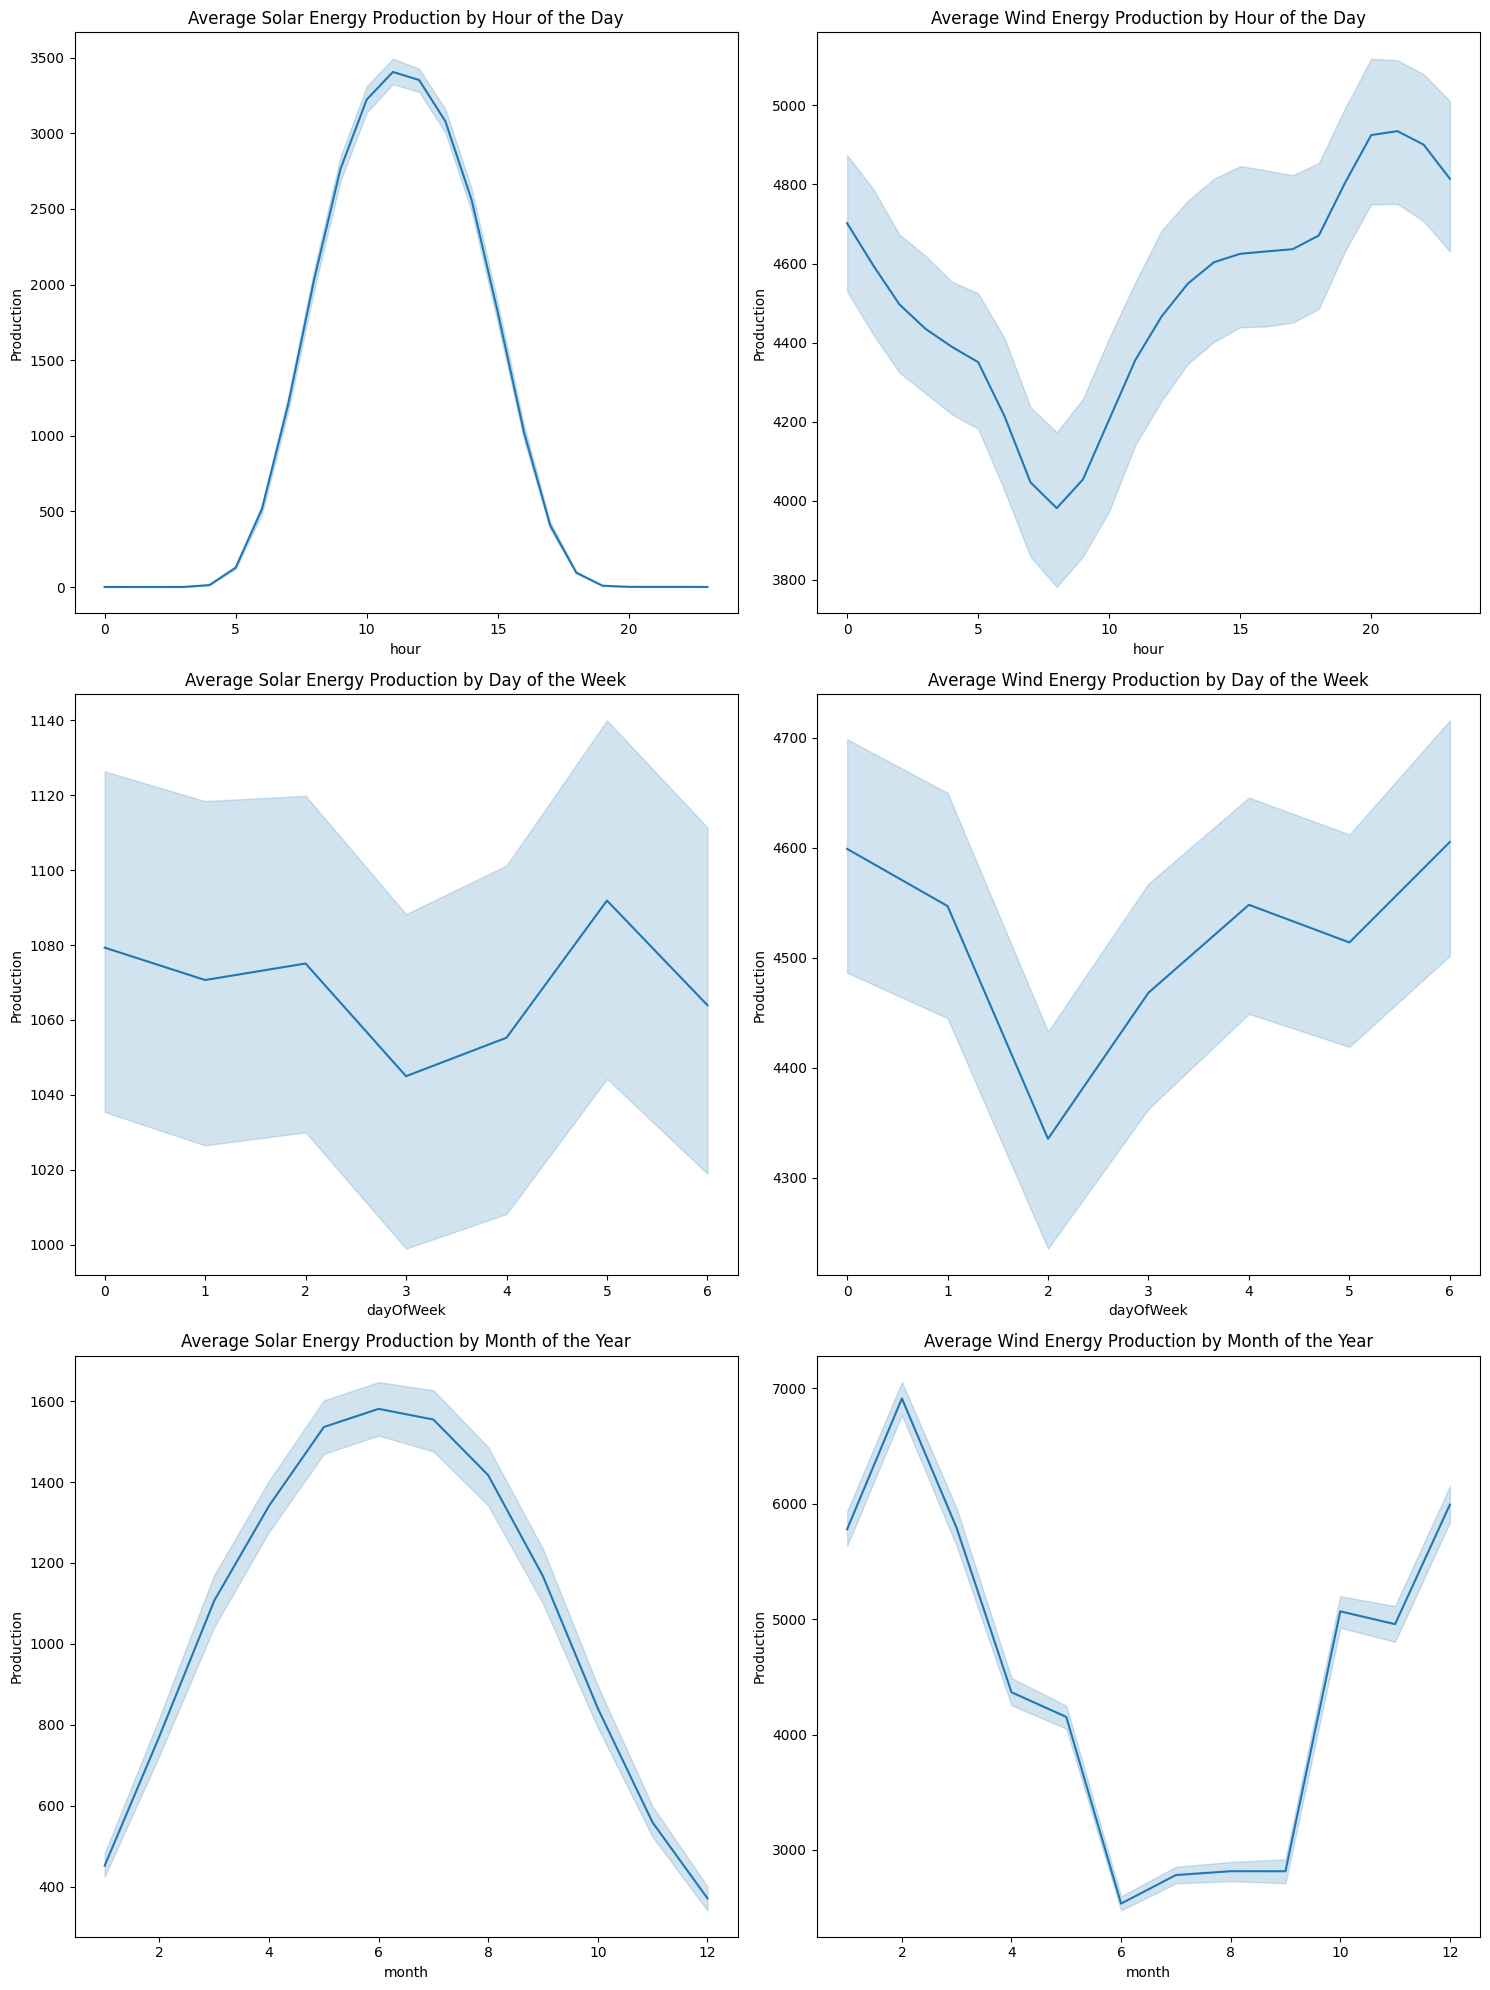

In [12]:
# Separate the data for solar and wind energy
data_solar_original = data[data['Source'] == 'Solar']
data_wind_original = data[data['Source'] == 'Wind']

# Resample the data to hourly frequency
data_solar_resampled = data_solar_original.resample('H').mean()
data_wind_resampled = data_wind_original.resample('H').mean()

# Create line plots of average energy production by hour of the day, day of the week, and month of the year
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Average solar energy production by hour of the day
sns.lineplot(ax=axes[0, 0], x='hour', y='Production', data=data_solar_resampled)
axes[0, 0].set_title('Average Solar Energy Production by Hour of the Day')

# Average wind energy production by hour of the day
sns.lineplot(ax=axes[0, 1], x='hour', y='Production', data=data_wind_resampled)
axes[0, 1].set_title('Average Wind Energy Production by Hour of the Day')

# Average solar energy production by day of the week
sns.lineplot(ax=axes[1, 0], x='dayOfWeek', y='Production', data=data_solar_resampled)
axes[1, 0].set_title('Average Solar Energy Production by Day of the Week')

# Average wind energy production by day of the week
sns.lineplot(ax=axes[1, 1], x='dayOfWeek', y='Production', data=data_wind_resampled)
axes[1, 1].set_title('Average Wind Energy Production by Day of the Week')

# Average solar energy production by month of the year
sns.lineplot(ax=axes[2, 0], x='month', y='Production', data=data_solar_resampled)
axes[2, 0].set_title('Average Solar Energy Production by Month of the Year')

# Average wind energy production by month of the year
sns.lineplot(ax=axes[2, 1], x='month', y='Production', data=data_wind_resampled)
axes[2, 1].set_title('Average Wind Energy Production by Month of the Year')

plt.tight_layout()
plt.show()

The above graphs successfully showcase Solar & Wind energy production with respect to Month & Day of Week & Hour of Day.